1. Data Source and Importing Libraries

In [ ]:
# Data source
("https://archive.ics.uci.edu/dataset/601/ ai4i+2020+predictive+maintenance+dataset")

# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import data
data_path = '/content/drive/MyDrive/MBA BAI SEMESTER 3/MINOR PROJECT/predictive_maintenance.csv'
df = pd.read_csv(data_path)
df.shape

(10000, 10)

2. Initial Data Exploration

In [ ]:
# View the first few rows
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


3. Data Cleaning and Preprocessing

In [ ]:
# Drop unnecessary columns
df.drop(['Product ID', 'UDI', 'Target', 'Type'], axis=1, inplace=True)

# Encode categorical variables
df['Failure Type'].replace({"No Failure": 0, "Heat Dissipation Failure": 1, "Power Failure": 2, "Overstrain Failure": 3, "Tool Wear Failure": 4, "Random Failures": 5}, inplace=True)


<ipython-input-23-5589fb3b0837>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Failure Type'].replace({"No Failure": 0, "Heat Dissipation Failure": 1, "Power Failure": 2, "Overstrain Failure": 3, "Tool Wear Failure": 4, "Random Failures": 5}, inplace=True)
<ipython-input-23-5589fb3b0837>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_opti

*4*. Data Analysis

       Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  Failure Type  
count  10000.000000     10000.000000  10000.000000  
mean      39.986910       107.951000      0.080600  
std        9.968934        63.654147      0.479507  
min        3.800000         0.000000      0.000000  
25%       33.200000    

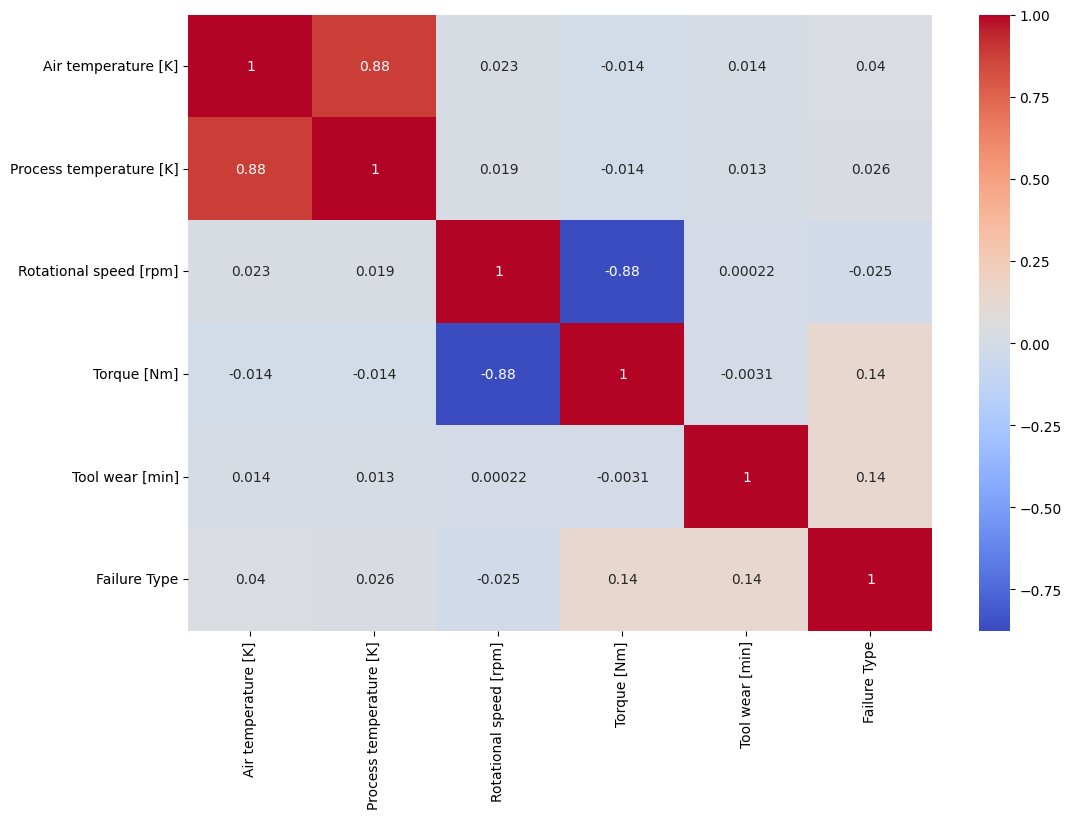

In [ ]:
# Statistical summary of numerical features
print(df.describe())

# Check for Missing Values
print(df.isnull().sum())

# Correlation Matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


*5*. Data Visualization

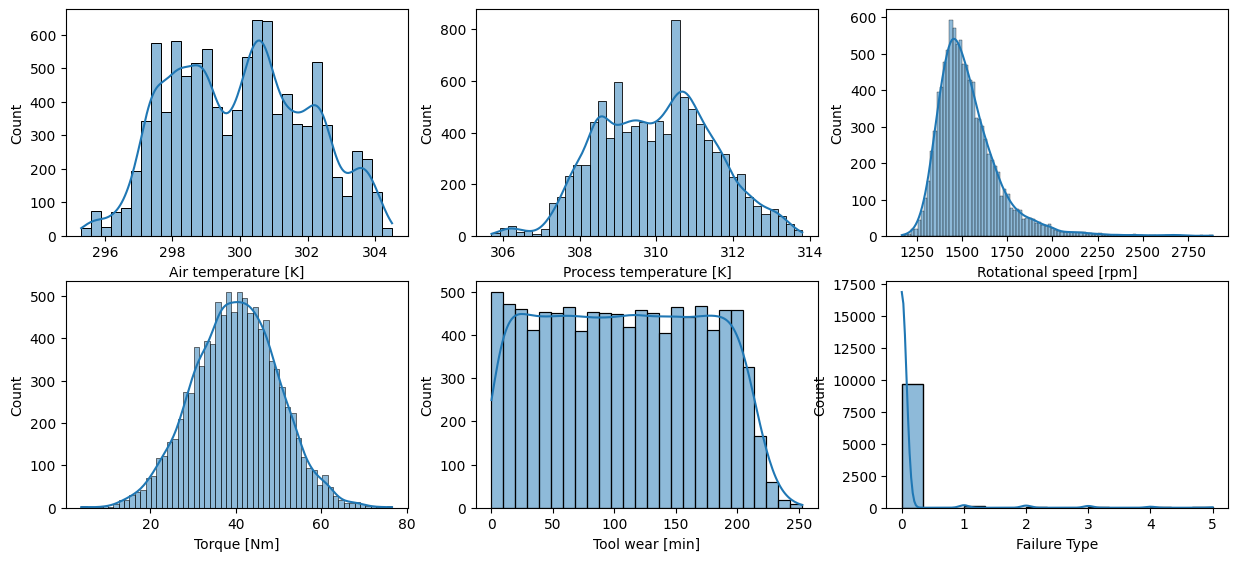

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
plt.show()


6. Data Splitting

In [ ]:
# Split the data into features and target variable
from sklearn.model_selection import train_test_split # Import train_test_split
X = df.drop('Failure Type', axis=1)
y = df['Failure Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7. Feature Scaling

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


8. Model Training and Evaluation

In [ ]:
# Train and evaluate multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=500, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}
results = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix
    }

    print(f"{model_name} Model Performance:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", class_report)
    print("Confusion Matrix:\n", conf_matrix)
    print("--------------------------------------------------------")

Logistic Regression Model Performance:
Accuracy: 0.595
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.59      0.74      1935
           1       0.18      1.00      0.30        15
           2       0.41      0.90      0.56        20
           3       0.20      1.00      0.33        13
           4       0.06      0.91      0.10        11
           5       0.00      0.17      0.00         6

    accuracy                           0.59      2000
   macro avg       0.31      0.76      0.34      2000
weighted avg       0.97      0.59      0.72      2000

Confusion Matrix:
 [[1133   67   26   51  169  489]
 [   0   15    0    0    0    0]
 [   0    2   18    0    0    0]
 [   0    0    0   13    0    0]
 [   0    0    0    1   10    0]
 [   4    0    0    0    1    1]]
--------------------------------------------------------
Decision Tree Model Performance:
Accuracy: 0.973
Classification Report:
               precision    rec

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Random Forest Model Performance:
Accuracy: 0.978
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1935
           1       0.91      0.67      0.77        15
           2       0.77      0.50      0.61        20
           3       0.71      0.38      0.50        13
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00         6

    accuracy                           0.98      2000
   macro avg       0.56      0.42      0.48      2000
weighted avg       0.97      0.98      0.97      2000

Confusion Matrix:
 [[1931    1    3    0    0    0]
 [   5   10    0    0    0    0]
 [   9    0   10    1    0    0]
 [   8    0    0    5    0    0]
 [  10    0    0    1    0    0]
 [   6    0    0    0    0    0]]
--------------------------------------------------------
XGBoost Model Performance:
Accuracy: 0.982
Classification Report:
               precision    recall  f1-scor

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


9. Results and Visualization

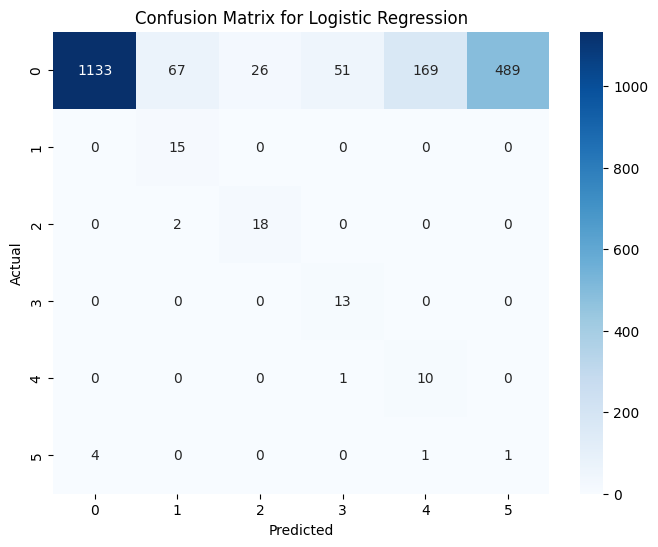

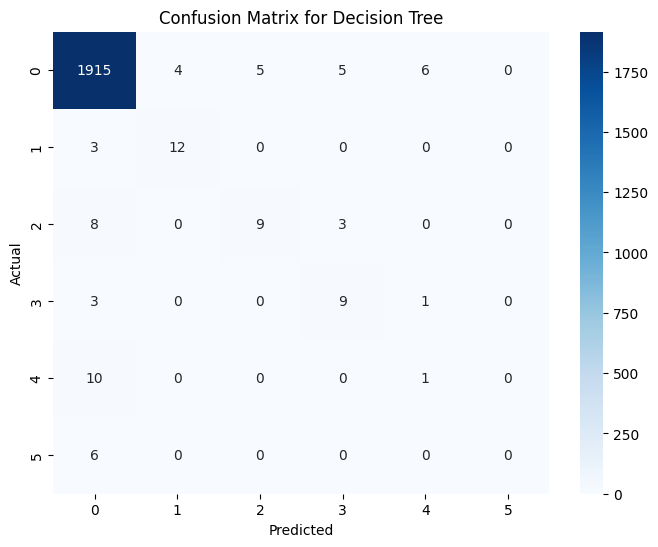

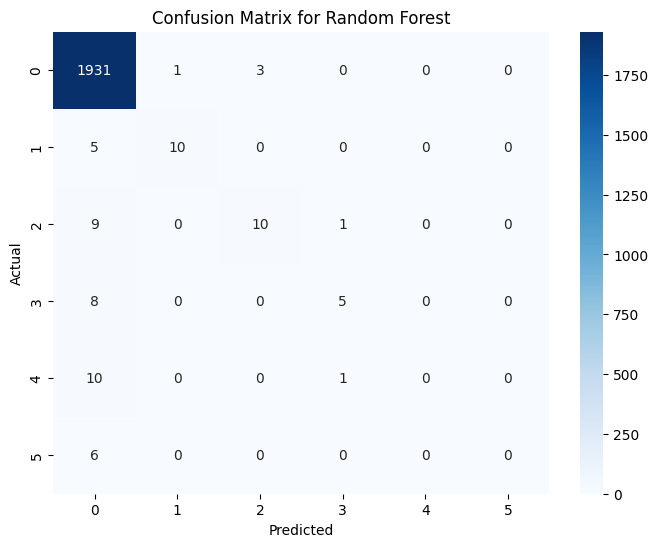

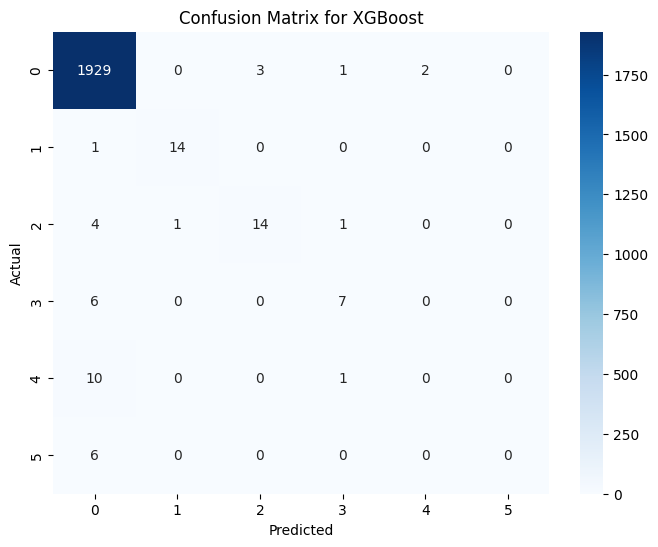

In [ ]:
# Visualize confusion matrices
for model_name, result in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
# Suggest the best model based on accuracy
best_model = max(results, key=lambda x: results[x]['accuracy'])
print(f"The best model is {best_model} with an accuracy of {results[best_model]['accuracy']}")

The best model is XGBoost with an accuracy of 0.982
